# 2. 기사 댓글 텍스트 마이닝

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import konlpy
import PIL
from wordcloud import WordCloud

df = pd.read_csv('news_comment_BTS.csv', encoding = 'UTF-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [88]:
# 불필요한 문자 제거하기
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex = True)
df['reply'].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

In [89]:
# kkma 만들기
kkma = konlpy.tag.Kkma()

# 명사 추출 - apply() 활용
nouns = df['reply'].apply(kkma.nouns)
nouns

0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2                   [팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]
3              [방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 탄, 자랑, 사랑]
1197                                              [애, 군대]
1198                                     [군, 군면제급, 면제, 급]
1199    [자랑, 축하, 김, 김남, 남, 김석진, 민, 민윤기, 윤기, 정, 정호석, 호석...
Name: reply, Length: 1200, dtype: object

In [90]:
# 한 행에 한 단어가 들어가도록 구성
nouns = nouns.explode()
nouns

0          국보
0       국보소년단
0         소년단
1         아줌마
2          팩트
        ...  
1199      박지민
1199      김태형
1199        전
1199      전정국
1199       정국
Name: reply, Length: 9353, dtype: object

In [91]:
# 데이터 프레임 만들기
df_word = pd.DataFrame({'word' : nouns})

# 글자 수 추가
df_word['count'] = df_word['word'].str.len()

# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0
...,...,...
1199,박지,2.0
1199,박지민,3.0
1199,김태형,3.0
1199,전정국,3.0


In [92]:
# 빈도표 만들기
df_word = df_word.groupby('word', as_index = False).agg(n = ('word', 'count')).sort_values('n', ascending = False)
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
1136,실력있음,1
406,다음주면,1
1134,신화,1
1133,신중,1


In [93]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


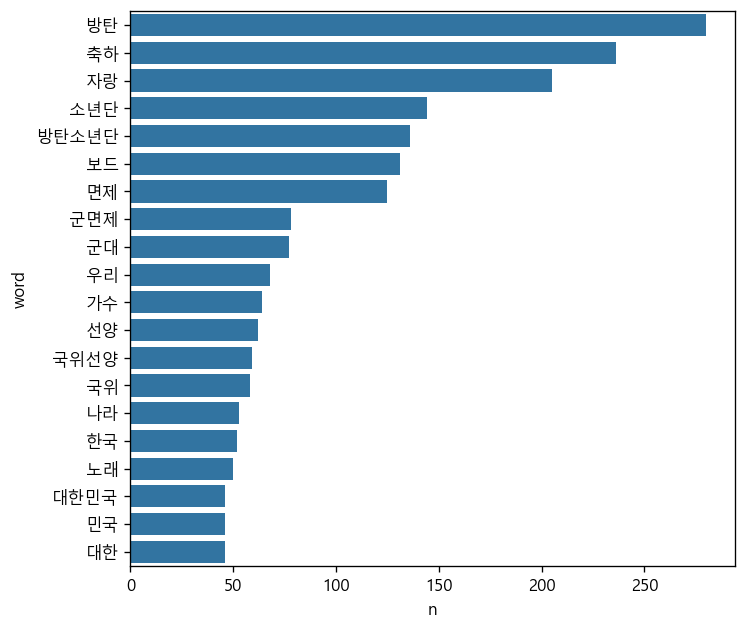

In [94]:
# 가로 세로 크기 설정
plt.rcParams.update({'font.family' : 'Malgun Gothic', 'figure.dpi' : '120', 'figure.figsize' : [6.5, 6]})

# 막대 그래프 만들기
sns.barplot(data = top20, x = 'n', y = 'word');

In [95]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']

font = 'DoHyeon-Regular.ttf'

icon = PIL.Image.open('cloud.png')
# 불러온 이미지 파일로 mask를 생성
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

In [96]:
# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)                  # mask 설정

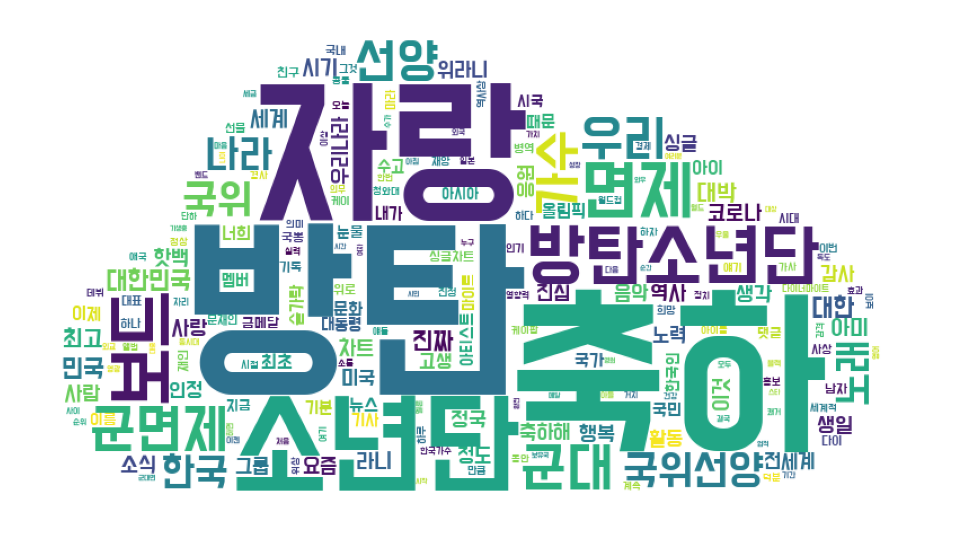

In [101]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud);      # 워드 클라우드 출력